In [139]:
import os
import math
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.optimize import curve_fit

In [140]:
# Import data

path = r"/Users/murilo/Documents/Unicamp/F 839/4o Exp/"

dataset = pd.read_csv(path + 'Dados.csv', sep = ',', header = 1).values

pos_int_laser = dataset[:40,0] # POSição na parte de perfil de INTensidade com fenda próxima do LASER
int_int_laser = dataset[:40,1] # INTensidade na parte de perfil de INTensidade com fenda próxima do LASER
pos_int_meio = dataset[:67,3]  # POSição na parte de perfil de INTensidade com fenda próxima do MEIO
int_int_meio = dataset[:67,4]  # INTensidade na parte de perfil de INTensidade com fenda próxima do MEIO
pos_int_diodo = dataset[:77,6] # POSição na parte de perfil de INTensidade com fenda próxima do fotoDIODO
int_int_diodo = dataset[:77,7] # INTensidade na parte de perfil de INTensidade com fenda próxima do fotoDIODO

pos = [pos_int_laser, pos_int_meio, pos_int_diodo]
p_int = [int_int_laser, int_int_meio, int_int_diodo]

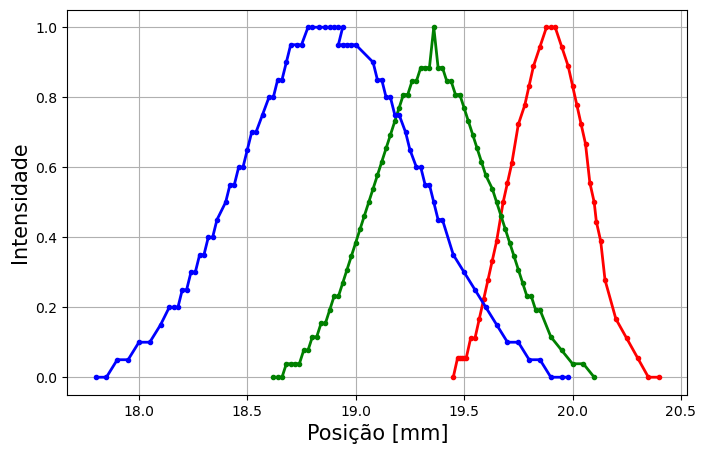

In [141]:
fig, ax = plt.subplots(figsize=(8, 5))
lw = 2
color = ['r', 'g', 'b']

# Plot the lines on top of the image
for i in range(0, len(pos)):
    ax.plot(pos[i], p_int[i]/max(p_int[i]), '.-', c = color[i],  linewidth = lw)

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.show()

In [142]:
# Define function to use as base of the adjustment
def fit(x, I0, r, w0):
    return I0 * np.exp(- 2 * ((x - r) / w0) ** 2)

# Define lists to add optmal parameters and the covariances
popt = [0, 0, 0]
pcov = [0, 0, 0]
perr = [0, 0, 0]

# Define inicial guesses
I0 = [18, 23, 20]
r = [19.89, 19.36, 18.86]
w0 = [0.34, 0.55, 0.1]

# Fit the curve
for i in range(0, 3):
    popt[i], pcov[i] = curve_fit(fit, pos[i], p_int[i], p0=[I0[i], r[i], w0[i]])
    
    # Print results
    print('--------', i)
    print('Parâmetros ajustados (I0,r,w0)')
    print(popt[i])
    print('\nMatrix de covariância')
    print(pcov[i])
    print('\nErro')
    perr[i] = np.sqrt(np.diag(pcov[i]))
    print(perr[i])



-------- 0
Parâmetros ajustados (I0,r,w0)
[18.02375797 19.89326444  0.34457019]

Matrix de covariância
[[ 1.93233239e-02 -1.43913956e-05 -2.56659340e-04]
 [-1.43913956e-05  2.16469218e-06  3.25118159e-07]
 [-2.56659340e-04  3.25118159e-07  9.37423231e-06]]

Erro
[0.13900836 0.00147129 0.00306174]
-------- 1
Parâmetros ajustados (I0,r,w0)
[23.3556677  19.35370184  0.53793013]

Matrix de covariância
[[ 1.41769112e-02 -2.88678179e-06 -2.28896134e-04]
 [-2.88678179e-06  2.56382701e-06  2.79774998e-07]
 [-2.28896134e-04  2.79774998e-07  1.08748830e-05]]

Erro
[0.11906683 0.0016012  0.00329771]
-------- 2
Parâmetros ajustados (I0,r,w0)
[20.07555628 18.87680288  0.80480786]

Matrix de covariância
[[ 6.42678539e-03 -4.40385010e-06 -1.96463864e-04]
 [-4.40385010e-06  3.80808769e-06  9.13772184e-07]
 [-1.96463864e-04  9.13772184e-07  1.75586124e-05]]

Erro
[0.08016723 0.00195143 0.0041903 ]


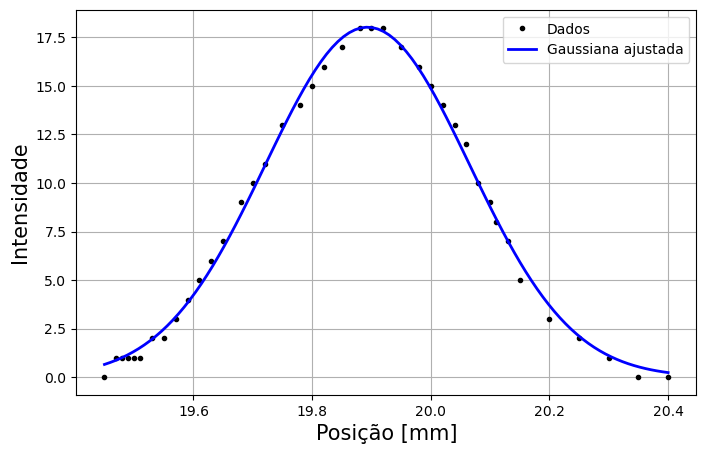

In [143]:
# Import data 
x = pos[0]
y = p_int[0]
I0_opt,r_opt,w0_opt = ['','',''],['','',''],['','','']

# Import optimal model
I0_opt[0], r_opt[0], w0_opt[0] = popt[0]
x_model = np.linspace(min(x), max(x), 100)
y_model = fit(x_model, I0_opt[0], r_opt[0], w0_opt[0])

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'b',  linewidth = lw, label = 'Gaussiana ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)
# ax.set_xlim(19.6, 19.7)
# ax.set_ylim(4.9, 7.5)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

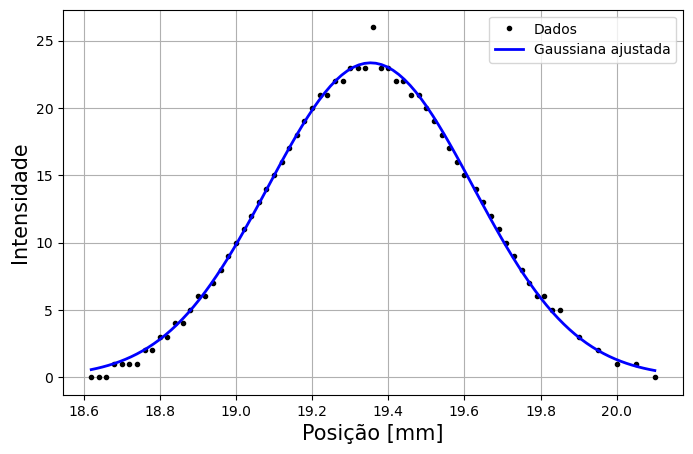

In [144]:
# Import data 
x = pos[1]
y = p_int[1]

# Import optimal model
I0_opt[1], r_opt[1], w0_opt[1] = popt[1]
x_model = np.linspace(min(x), max(x), 100)
y_model = fit(x_model, I0_opt[1], r_opt[1], w0_opt[1])

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'b',  linewidth = lw, label = 'Gaussiana ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

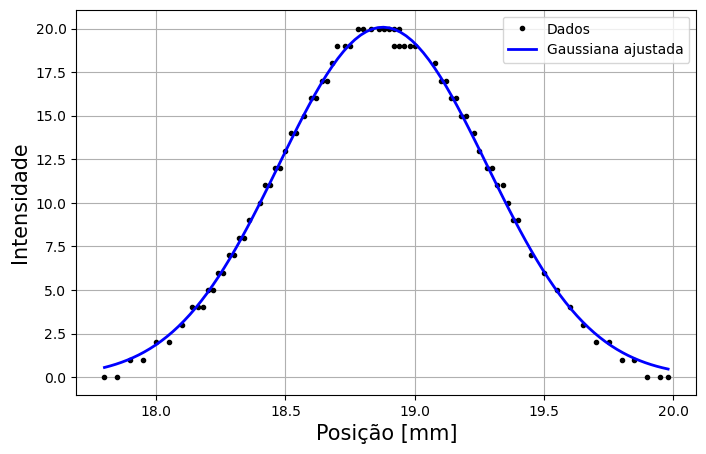

In [145]:
# Import data 
x = pos[2]
y = p_int[2]

# Import optimal model
I0_opt[2], r_opt[2], w0_opt[2] = popt[2]
x_model = np.linspace(min(x), max(x), 100)
y_model = fit(x_model, I0_opt[2], r_opt[2], w0_opt[2])

# Begin plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set parameters
lw = 2

# Plot the lines on top of the image
ax.plot(x, y, '.', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'b',  linewidth = lw, label = 'Gaussiana ajustada')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

In [151]:
print("w0 =", popt[0][2], "±", perr[0][2])

w0 = 0.34457019140286793 ± 0.0030617368126710253


In [155]:
print("theta =", 633 * (10 ** -6) / (np.pi * popt[0][2] * (10 ** -3)))
print("\n")
print((633 * (10 ** -6)/ (np.pi * (10 ** -3))) * (1 / (popt[0][2] - 0.5 * perr[0][2]) - 1 / (popt[0][2] + 0.5 *perr[0][2])))

theta = 0.5847579476738871


0.0051960683775945414


In [159]:
print("Z0 =", np.pi * (popt[0][2] ** 2) / (633 * 10 ** -6))
print("Z0 =", 2 * np.pi * perr[0][2] * popt[0][2]/ (633 * 10 ** -6))
print("Z0 =", np.pi * ((perr[0][2] + 0.5 * popt[0][2])** 2 - ((perr[0][2] - 0.5 * popt[0][2])** 2))/ (633 * 10 ** -6))

Z0 = 589.2526861302805
Z0 = 10.471809147187585
Z0 = 10.47180914718759


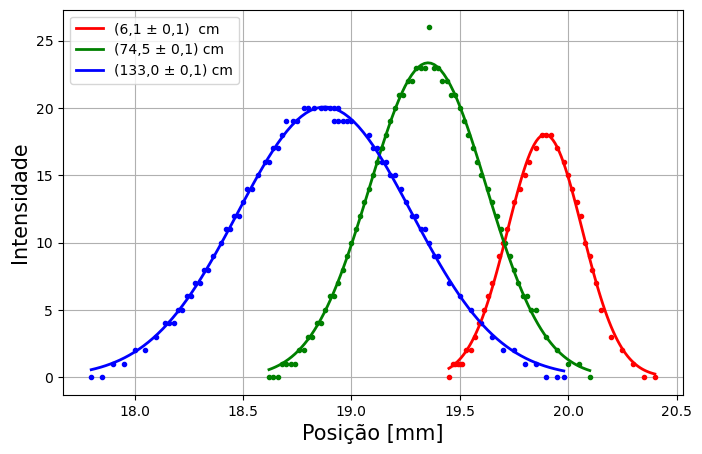

In [149]:
fig, ax = plt.subplots(figsize=(8, 5))
lw = 2
color = ['r', 'g', 'b']

# Import optimal model
I0_opt[0], r_opt[0], w0_opt[0] = popt[0]
x_model = np.linspace(min(pos[0]), max(pos[0]), 100)
y_model = fit(x_model, I0_opt[0], r_opt[0], w0_opt[0])
I0_opt[1], r_opt[1], w0_opt[1] = popt[1]
x_model1 = np.linspace(min(pos[1]), max(pos[1]), 100)
y_model1 = fit(x_model1, I0_opt[1], r_opt[1], w0_opt[1])
I0_opt[2], r_opt[2], w0_opt[2] = popt[2]
x_model2 = np.linspace(min(pos[2]), max(pos[2]), 100)
y_model2 = fit(x_model2, I0_opt[2], r_opt[2], w0_opt[2])

# Plot the lines on top of the image
for i in range(0, len(pos)):
    ax.plot(pos[i], p_int[i], '.', c = color[i],  linewidth = lw)

ax.plot(x_model, y_model, '-', c = 'r',  linewidth = lw, label = '(6,1 ± 0,1)  cm')
ax.plot(x_model1, y_model1, '-', c = 'g',  linewidth = lw, label = '(74,5 ± 0,1) cm')
ax.plot(x_model2, y_model2, '-', c = 'b',  linewidth = lw, label = '(133,0 ± 0,1) cm')

# Set the axis labels and limits
ax.set_ylabel('Intensidade', size=15)
ax.set_xlabel('Posição [mm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend(loc = "upper left")
plt.show()

# Knife Edge

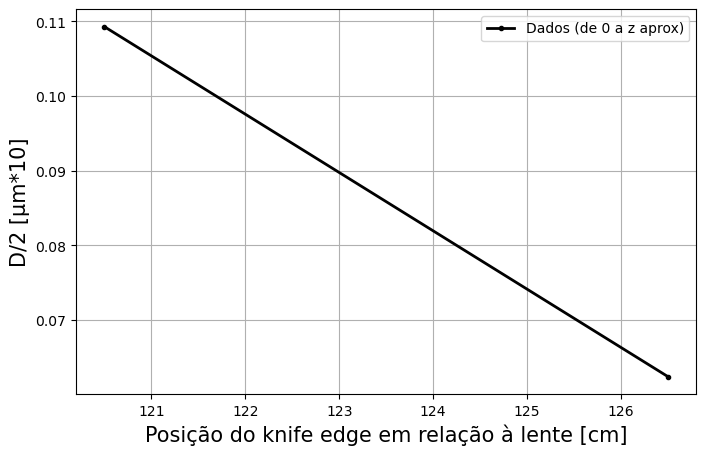

TypeError: unsupported operand type(s) for -: 'str' and 'float'

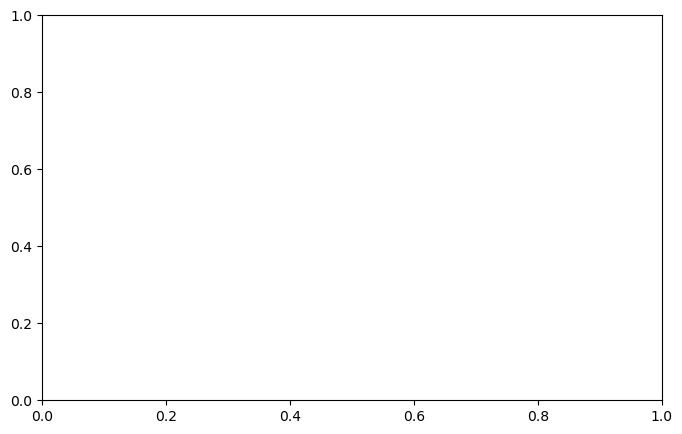

In [150]:
pos_90 = dataset[:21,9] # Posição da gilette em 90% (em micrometros*10)
pos_10 = dataset[:21,10] # Posição da knife edge em 10% (em micrometros*10)
pos_knife = dataset[:21,11] # Posição do knife edge

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos_knife, 1.561*np.absolute(pos_90 - pos_10)/2, '.-', c = 'k',  linewidth = lw, 
        label = 'Dados (de 0 a z aprox)')

# Set the axis labels and limits
ax.set_ylabel('D/2 [µm*10]', size=15)
ax.set_xlabel('Posição do knife edge em relação à lente [cm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

#######################################################################

pos2_90 = dataset[:16,14] # Posição da gilette em 90%
pos2_10 = dataset[:16,15] # Posição da knife edge em 10%
pos2_knife = dataset[:16,16] # Posição do knife edge

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos2_knife, 1.561*np.absolute(pos2_90 - pos2_10)/2, '.-', c = 'k',  linewidth = lw, 
        label = 'Dados (de 0 a 2f aprox)')

# Set the axis labels and limits
ax.set_ylabel('D/2 [µm*10]', size=15)
ax.set_xlabel('Posição do knife edge em relação à lente [cm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos_knife[:3], (1.561*np.absolute(pos_90 - pos_10)/2)[:3], '.', c = 'k',  linewidth = lw, label = 'Dados (de 0 a z aprox)')
ax.plot(pos2_knife, (1.561*np.absolute(pos2_90 - pos2_10)/2), '.', c = 'b',  linewidth = lw, label = 'Dados (de 0 a 2f aprox)')
ax.plot([8.5,8.5], [0,0.25], '-', c = 'y',  linewidth = lw, label = 'F = 8,5cm')

# Set the axis labels and limits
ax.set_ylabel('D/2 [µm*10]', size=15)
ax.set_xlabel('Posição do knife edge [cm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

#####################################################################################################################################

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pos_knife, (1.561*np.absolute(pos_90 - pos_10)/2), '.', c = 'k',  linewidth = lw, label = 'Dados (de 0 a z aprox)')
ax.plot(pos2_knife, (1.561*np.absolute(pos2_90 - pos2_10)/2), '.', c = 'b',  linewidth = lw, label = 'Dados (de 0 a 2f aprox)')
ax.plot([8.5,8.5], [0,0.25], '-', c = 'y',  linewidth = lw, label = 'F = 8,5cm')

# Set the axis labels and limits
ax.set_ylabel('D/2 [µm*10]', size=15)
ax.set_xlabel('Posição do knife edge [cm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

In [ ]:
# Define function to use as base of the adjustment
def fitWz(z, w0, z0, zmin):
  return w0*(1+((z-zmin)/z0)**2)**(1/2)

xtotal = np.concatenate([pos_knife[:],pos2_knife[1:]])
ytotal = np.concatenate([(1.561*np.absolute(pos_90 - pos_10)/2)[:],(1.561*np.absolute(pos2_90 - pos2_10)/2)[1:]])


# Define inicial guesses

#w0 = 
#z0 = 
zmin = 8.5

# Fit the curve

popt, pcov = curve_fit(fitWz, xtotal, ytotal, p0 = [0.07, 4, 8.5])

# Print results
print('--------', i)
print('Parâmetros ajustados (w0,z0,zmin)')
print(popt)
print('\nMatrix de covariância')
print(pcov)
print('\nErro')
perr = np.sqrt(np.diag(pcov))
print(perr)

xtotalShow = xtotal
ytotalShow = ytotal

fig, ax = plt.subplots(figsize=(8, 5))
x_model = np.linspace(0*min(xtotalShow), max(xtotalShow), 100)
y_model = fitWz(x_model, popt[0], popt[1], popt[2])

ax.plot(xtotalShow, ytotalShow, '.', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'b',  linewidth = lw, label = 'Fit')
#
ax.plot([8,8], [0,0.25], '-', c = 'cyan',  linewidth = lw, label = 'Foco = (8 ± 1)cm')
#
ax.plot([popt[2],popt[2]], [0,0.25], '-', c = 'magenta',  linewidth = lw, label = 'Zmin = (7,1 ± 0,4) cm')



# Set the axis labels and limits
ax.set_ylabel('Raio do feixe: "ω(z)" [µm*10]', size=15)
ax.set_xlabel('Posição do feixe em relação à lente: "z" [cm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()

####################################################################################################

xtotalShow = np.concatenate([pos_knife[:3],pos2_knife[1:]])
ytotalShow = np.concatenate([(1.561*np.absolute(pos_90 - pos_10)/2)[:3],(1.561*np.absolute(pos2_90 - pos2_10)/2)[1:]])

fig, ax = plt.subplots(figsize=(8, 5))
x_model = np.linspace(0*min(xtotalShow), max(xtotalShow), 100)
y_model = fitWz(x_model, popt[0], popt[1], popt[2])

ax.plot(xtotalShow, ytotalShow, '.', c = 'k',  linewidth = lw, label = 'Dados')
ax.plot(x_model, y_model, '-', c = 'b',  linewidth = lw, label = 'Fit')
#
ax.plot([7,9], [0.125,0.125], '-', c = 'cyan',  linewidth = lw)
ax.plot([8,8], [0.025,0.125], '-', c = 'cyan',  linewidth = lw, label = 'Foco = (8 ± 1)cm')
ax.plot([7,9], [0.025,0.025], '-', c = 'cyan',  linewidth = lw)
#
ax.plot([popt[2]-perr[2],popt[2]+perr[2]], [0.15,0.15], '-', c = 'magenta',  linewidth = lw)
ax.plot([popt[2],popt[2]], [0,0.15], '-', c = 'magenta',  linewidth = lw, label = 'Zmin = (7,1 ± 0,4) cm')
ax.plot([popt[2]-perr[2],popt[2]+perr[2]], [0,0], '-', c = 'magenta',  linewidth = lw)


# Set the axis labels and limits
ax.set_ylabel('Raio do feixe: "ω(z)" [µm*10]', size=15)
ax.set_xlabel('Posição do feixe em relação à lente: "z" [cm]', size=15)

# Show the grid
ax.grid(True, which='both')

plt.legend()
plt.show()